In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [38]:
df = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [3]:
df.describe().round(3)

,Id,LotFrontage,LotArea,YearBuilt,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,OpenPorchSF,SalePrice,Condition,Mean_rank,YearRemod,Exterior,TotalSF,TotalBath,WoodYN,Age
count,1460.00,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,70.205,10516.828,1971.268,0.935,1515.464,2.866,1.047,0.613,472.980,46.660,180921.196,0.866,5.837,0.477,0.147,2567.049,2.211,0.521,36.548
std,421.61,23.051,9981.265,30.203,0.247,525.480,0.816,0.220,0.645,213.805,66.256,79442.503,0.340,0.847,0.500,0.354,821.714,0.785,0.500,30.250
min,1.00,21.000,1300.000,1872.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,34900.000,0.000,1.000,0.000,0.000,334.000,1.000,0.000,0.000
25%,365.75,60.000,7553.500,1954.000,1.000,1129.500,2.000,1.000,0.000,334.500,0.000,129975.000,1.000,5.500,0.000,0.000,2009.500,2.000,0.000,8.000
50%,730.50,69.500,9478.500,1973.000,1.000,1464.000,3.000,1.000,1.000,480.000,25.000,163000.000,1.000,6.000,0.000,0.000,2474.000,2.000,1.000,35.000
75%,1095.25,80.000,11601.500,2000.000,1.000,1776.750,3.000,1.000,1.000,576.000,68.000,214000.000,1.000,6.500,1.000,0.000,3004.000,2.500,1.000,54.000
max,1460.00,313.000,215245.000,2010.000,1.000,5642.000,8.000,3.000,3.000,1418.000,547.000,755000.000,1.000,9.500,1.000,1.000,11752.000,6.000,1.000,136.000


<AxesSubplot: >

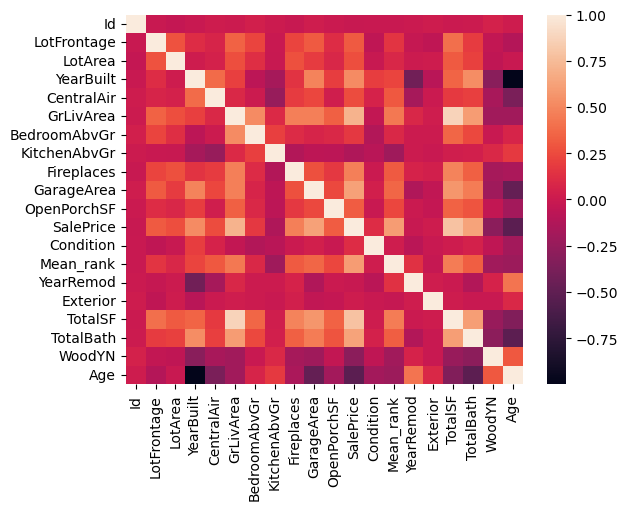

In [5]:
corr_df = df.corr()
sns.heatmap(corr_df)

In [6]:
corr_df.SalePrice.sort_values(ascending = False)

SalePrice       1.000000
TotalSF         0.782260
GrLivArea       0.708624
TotalBath       0.631731
GarageArea      0.623431
Mean_rank       0.594786
YearBuilt       0.522897
Fireplaces      0.466929
OpenPorchSF     0.315856
LotFrontage     0.310673
LotArea         0.263843
CentralAir      0.251328
BedroomAbvGr    0.168213
Condition       0.113247
Exterior        0.009936
Id             -0.021917
YearRemod      -0.021933
KitchenAbvGr   -0.135907
WoodYN         -0.297662
Age            -0.523350
Name: SalePrice, dtype: float64

In [56]:
def split_data(df, df_test, atributos):
    X = df[atributos]
    y = df.SalePrice
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    X_pred = test[atributos]
    X_pred = scaler.fit_transform(X_pred)
    
    return X_train, X_test, y_train, y_test, X_pred

In [46]:
def ret_df(pred, nombre):
    df_reg = pd.DataFrame()
    df_reg['Id'] = test.Id
    df_reg['SalePrice'] = pd.Series(pred)
    df_reg.set_index('Id', inplace = True)
    df_reg.to_csv("D:/DatosD/Ml/Supervizado/Kaggle/House_price/Resultados/" + str(nombre) + ".csv")

In [37]:
atributos = ['TotalSF', 'GrLivArea', 'TotalBath', 'GarageArea', 'Mean_rank', 'Age']
X_train, X_test, y_train, y_test, X_pred = split_data(df, test, atributos)

## Regresion multiple

Atributos = 'TotalSF', 'GrLivArea', 'TotalBath', 'GarageArea', 'Mean_rank', 'Age'

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
model.score(X_test, y_test)

0.8090038169980238

In [25]:
reg_mult = model.predict(X_pred)

In [47]:
ret_df(reg_mult, "A_reg_mult")

### Reg con todos los atributos

In [58]:
atrib = ['LotFrontage', 'LotArea', 'YearBuilt', 'CentralAir', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'OpenPorchSF', 'Condition', 'Mean_rank', 'YearRemod',
       'Exterior', 'TotalSF', 'TotalBath', 'WoodYN', 'Age']
X_train, X_test, y_train, y_test, X_pred = split_data(df, test, atrib)

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8219150807228407